# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# loading dataset

In [3]:
data=pd.read_csv("Crop_recommendation_expanded.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
5995,79,48,34,29.444418,79.779061,6.857715,226.326828,jute
5996,67,56,19,21.359298,59.646458,6.441041,108.944966,maize
5997,29,74,18,17.000004,19.619344,5.554778,102.145753,kidneybeans
5998,22,17,4,25.153839,84.962187,6.886364,86.165312,orange


# Data Preprocessing / Exploration

In [5]:
# Basic exploration

In [6]:
data.shape

(6000, 8)

In [7]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            6000 non-null   int64  
 1   P            6000 non-null   int64  
 2   K            6000 non-null   int64  
 3   temperature  6000 non-null   float64
 4   humidity     6000 non-null   float64
 5   ph           6000 non-null   float64
 6   rainfall     6000 non-null   float64
 7   label        6000 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 375.1+ KB


In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,50.334000,53.414167,47.967167,25.638803,71.712064,6.465925,103.477839
std,37.198948,33.216013,50.851995,5.446789,23.062764,0.931189,56.605573
min,0.000000,4.000000,4.000000,8.708882,11.835287,3.046140,15.678795
25%,20.000000,28.000000,20.000000,22.224291,59.294753,5.855159,63.488366
50%,37.000000,50.000000,31.000000,25.524310,78.132269,6.421510,93.097910
75%,84.000000,68.000000,48.000000,28.827226,89.339779,7.009276,126.735639
max,155.000000,171.000000,267.000000,53.561598,126.247193,11.050283,355.000803


In [11]:
#preprocessing

In [12]:
# Check for missing values

In [13]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
le1=LabelEncoder()

In [16]:
data['label']=le1.fit_transform(data['label'])

In [17]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
5995,79,48,34,29.444418,79.779061,6.857715,226.326828,8
5996,67,56,19,21.359298,59.646458,6.441041,108.944966,11
5997,29,74,18,17.000004,19.619344,5.554778,102.145753,9
5998,22,17,4,25.153839,84.962187,6.886364,86.165312,16


In [18]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int32
dtype: object

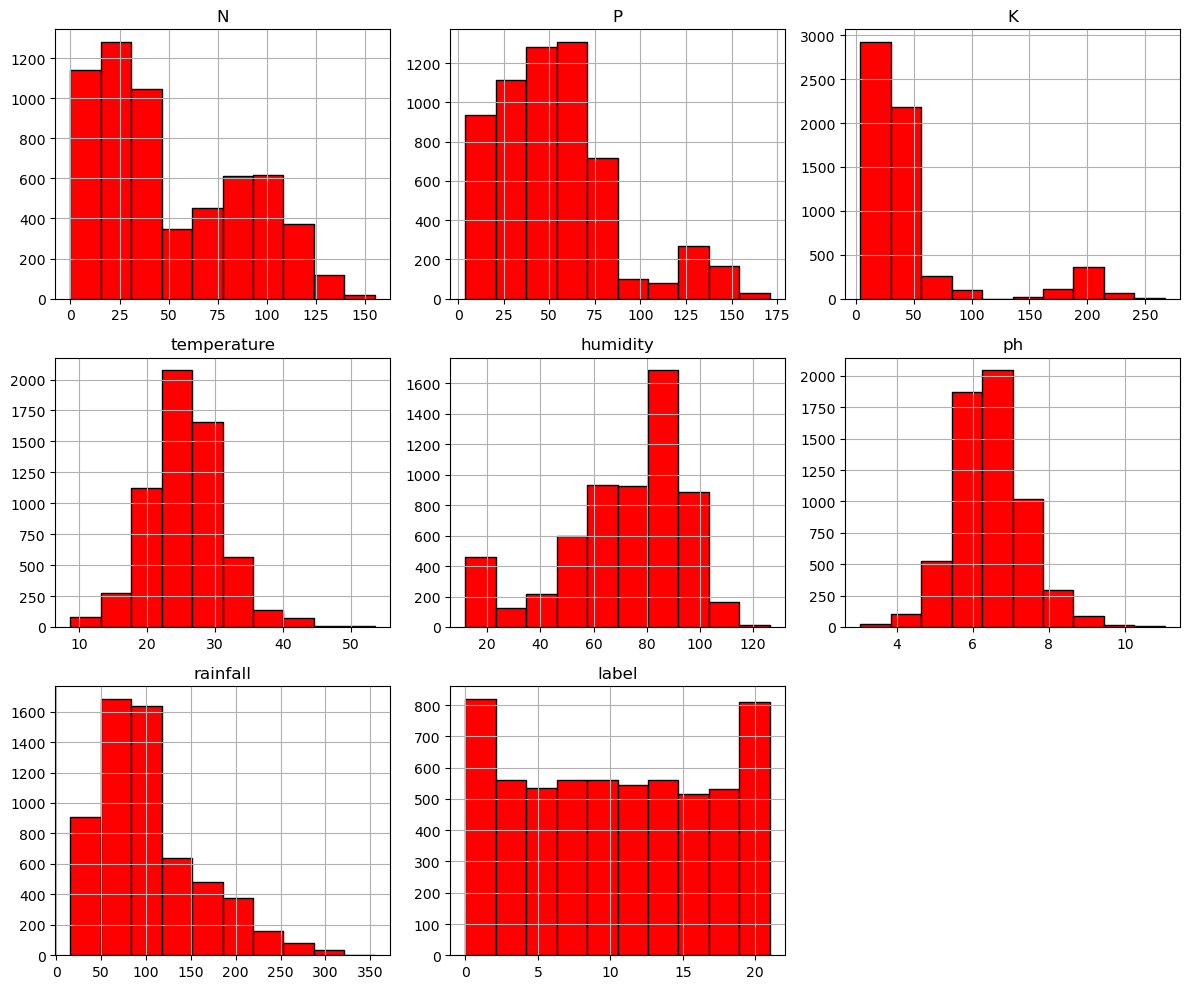

In [20]:
data.hist(figsize=(12,10),color='red',edgecolor='black')
plt.tight_layout()
plt.show()

In [21]:
# Count of each fertilizer type

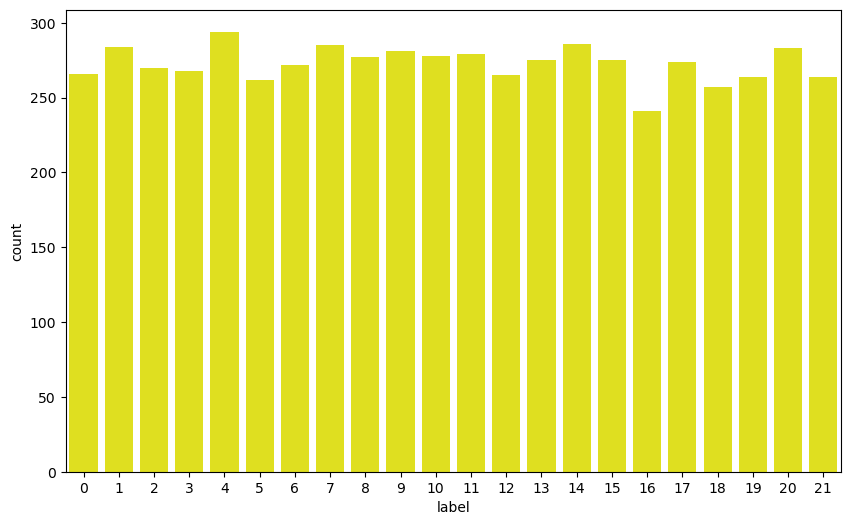

In [22]:
plt.figure(figsize=(10,6)) 
sns.countplot(data=data, x='label',color='yellow') 
plt.show()

<Figure size 1000x600 with 0 Axes>

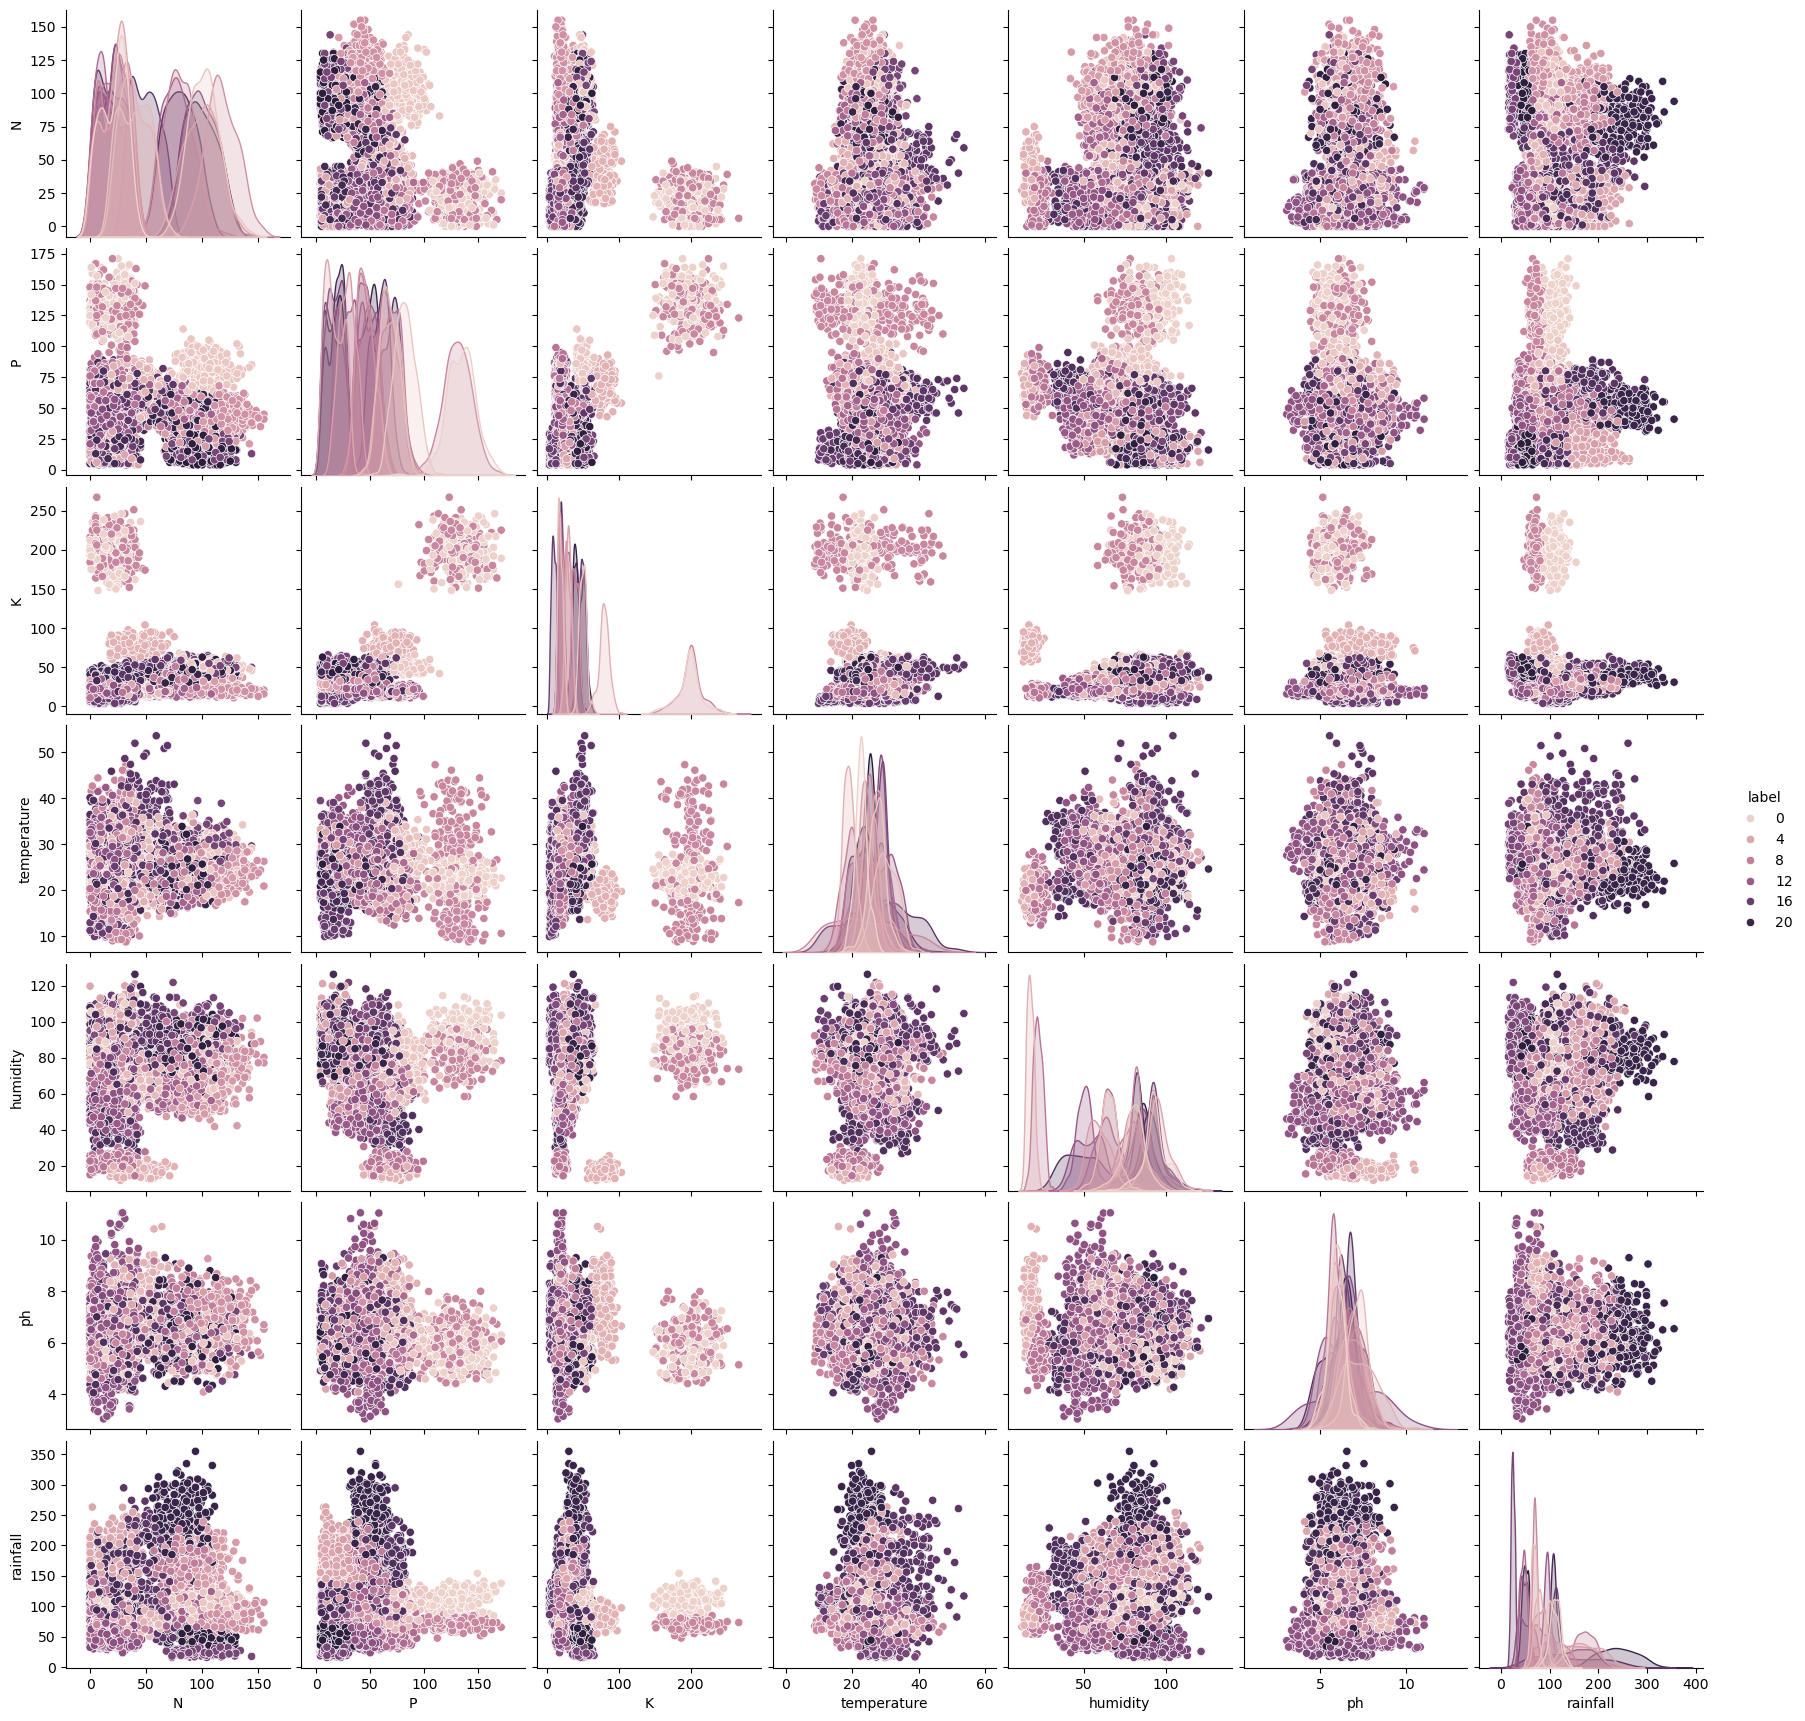

In [23]:
plt.figure(figsize=(10,6)) 
sns.pairplot(data,hue='label',diag_kind='kde')
plt.show()

# Feature-Target Separation

In [25]:
x= data.drop('label', axis=1) 
y= data['label'] 

In [26]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
5995,79,48,34,29.444418,79.779061,6.857715,226.326828
5996,67,56,19,21.359298,59.646458,6.441041,108.944966
5997,29,74,18,17.000004,19.619344,5.554778,102.145753
5998,22,17,4,25.153839,84.962187,6.886364,86.165312


In [27]:
y

0       20
1       20
2       20
3       20
4       20
        ..
5995     8
5996    11
5997     9
5998    16
5999     8
Name: label, Length: 6000, dtype: int32

# Train_Test_Split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=200)

In [63]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

Text(0.5, 1.0, 'After Removing\xa0Outliers')

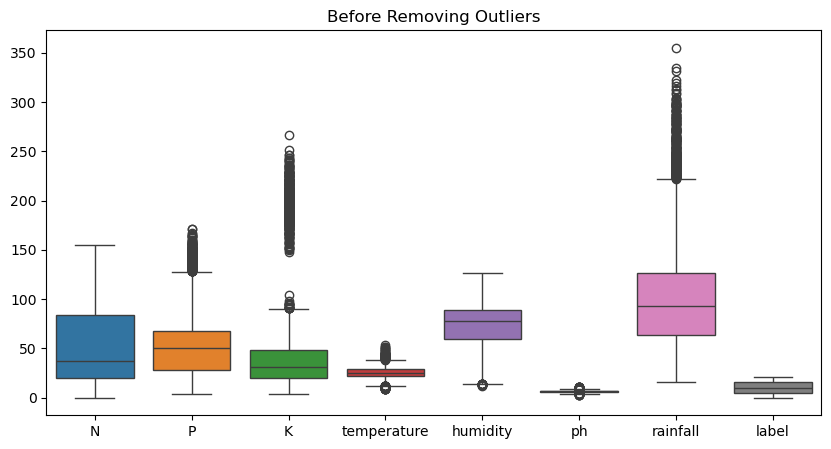

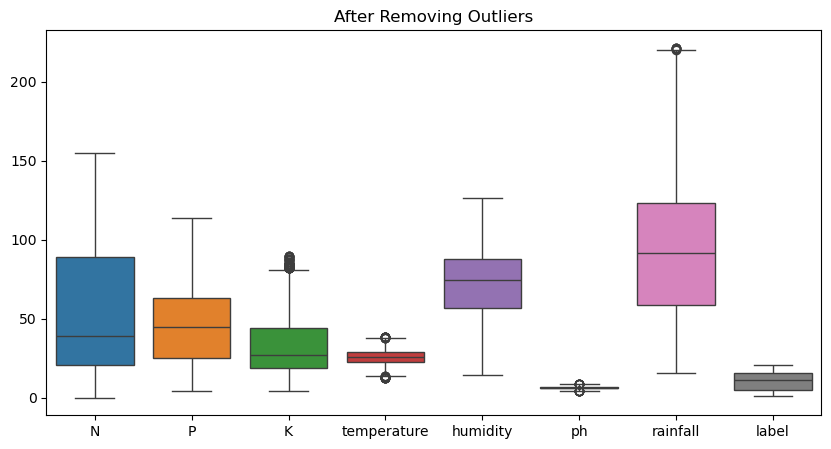

In [69]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.title("Before Removing Outliers")

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_no_outliers)
plt.title("After Removing Outliers")

# Model Training


## Logistic Regression

In [73]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [74]:
logistic_model.score(x_test,y_test)

0.922

In [75]:
logistic_model.score(x_train,y_train)

0.932

## Random Forest

In [80]:
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
RF_model.score(x_test,y_test)

0.9673333333333334

In [83]:
RF_model.score(x_train,y_train)

1.0

## Decision Tree

In [85]:
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
DT_model.score(x_test,y_test)

0.9273333333333333

In [87]:
DT_model.score(x_train,y_train)

1.0

## k Nearsest Neighbor(KNN)

In [90]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [91]:
KNN_model.score(x_test,y_test)

0.952

In [92]:
KNN_model.score(x_train,y_train)

0.9684444444444444

## Support Vector Mechanism(SVM)

In [95]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.958

In [96]:
svm.score(x_train,y_train)

0.974

In [97]:
svm1=SVC(kernel='poly',C=5,degree=3,gamma='auto')
svm1.fit(x_train,y_train)
svm1.score(x_test,y_test)

0.9406666666666667

In [98]:
svm1.score(x_train,y_train)

0.9822222222222222

In [99]:
svm2=SVC(kernel='sigmoid')
svm2.fit(x_train,y_train)
svm2.score(x_test,y_test)

0.037333333333333336

In [102]:
svm2.score(x_train,y_train)

0.042

In [103]:
svm3=SVC(kernel='rbf')
svm3.fit(x_train,y_train)
svm3.score(x_test,y_test)

0.9506666666666667

In [105]:
svm3.score(x_train,y_train)

0.954

In [109]:
svm4=SVC()
svm4.fit(x_train,y_train)
svm4.score(x_test,y_test)

0.9506666666666667

In [111]:
svm4.score(x_train,y_train)

0.954

## Naive Bayes(GaussianNB)

In [115]:
gaus_model=GaussianNB()
gaus_model.fit(x_train,y_train)

GaussianNB()

In [116]:
gaus_model.score(x_test,y_test)

0.97

In [117]:
gaus_model.score(x_train,y_train)

0.9693333333333334

## Ensemble Model

### AdaBoost

In [122]:
adaboost= AdaBoostClassifier(n_estimators=400,learning_rate=0.3,random_state=10)

In [124]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=400, random_state=10)

In [125]:
adaboost.score(x_test,y_test)

0.3626666666666667

In [127]:
adaboost.score(x_train,y_train)

0.37044444444444447

### GradientBoosting

In [130]:
grad_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [131]:
grad_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

In [132]:
grad_model.score(x_test,y_test)

0.9206666666666666

In [133]:
grad_model.score(x_train,y_train)

0.9431111111111111

### XGBClassfier

In [136]:
xg_model=XGBClassifier()

In [137]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [138]:
xg_model.score(x_test,y_test)

0.9566666666666667

In [139]:
xg_model.score(x_train,y_train)

1.0

# Cross validation

In [142]:
from sklearn.model_selection import KFold,StratifiedKFold


In [143]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return model.score(x_test,y_test)
    # return accuracy_score(y_test, predictions)

In [145]:
fold = StratifiedKFold(n_splits=6)
log_score = []
dt_score = []
rf_score = []
knn_score = []
svm_score = []
nb_score = []
adb_score = []
xg_score=[]
gr_score = []

for train_index, test_index in fold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log_score.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeClassifier(max_depth=7), x_train, x_test, y_train, y_test))
    rf_score.append(get_score(RandomForestClassifier(random_state=34), x_train, x_test, y_train, y_test))
    knn_score.append(get_score(KNeighborsClassifier(), x_train, x_test, y_train, y_test))
    svm_score.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    nb_score.append(get_score(GaussianNB(), x_train, x_test, y_train, y_test))
    adb_score.append(get_score(AdaBoostClassifier(), x_train, x_test, y_train, y_test))
    xg_score.append(get_score(XGBClassifier(), x_train, x_test, y_train, y_test))
    gr_score.append(get_score(GradientBoostingClassifier(), x_train, x_test, y_train, y_test))

# Now we can analyze the scores as needed
print("Logistic Regression Scores:",log_score)
print("Decision Tree Scores:",dt_score)
print("Random Forest Scores:",rf_score)
print("K-Nearest Neighbors Scores:",knn_score)
print("SVM Scores:",svm_score)
print("Naive Bayes Scores:",nb_score)
print("AdaBoost Scores:",adb_score)
print("XGBoost scores:",xg_score)
print("Gradient Boosting Scores:",gr_score)

Logistic Regression Scores: [0.964, 0.966, 0.908, 0.907, 0.899, 0.907]
Decision Tree Scores: [0.846, 0.77, 0.734, 0.72, 0.706, 0.705]
Random Forest Scores: [0.994, 0.991, 0.952, 0.944, 0.949, 0.945]
K-Nearest Neighbors Scores: [0.979, 0.976, 0.944, 0.946, 0.941, 0.936]
SVM Scores: [0.982, 0.979, 0.943, 0.937, 0.937, 0.937]
Naive Bayes Scores: [0.989, 0.983, 0.957, 0.958, 0.959, 0.958]
AdaBoost Scores: [0.232, 0.183, 0.174, 0.237, 0.182, 0.326]
XGBoost scores: [0.989, 0.992, 0.949, 0.943, 0.948, 0.939]
Gradient Boosting Scores: [0.993, 0.989, 0.943, 0.936, 0.936, 0.942]


In [146]:
model_scores = {
 'Logistic Regression Scores': [0.964, 0.966, 0.908, 0.907, 0.899, 0.907],
'Decision Tree Scores': [0.846, 0.77, 0.731, 0.72, 0.706, 0.706],
'Random Forest Scores': [0.994, 0.991, 0.952, 0.944, 0.949, 0.945],
'K-Nearest Neighbors Scores': [0.979, 0.976, 0.944, 0.946, 0.941, 0.936],
'SVM Scores': [0.982, 0.979, 0.943, 0.937, 0.937, 0.937],
'Naive Bayes Scores': [0.989, 0.983, 0.957, 0.958, 0.959, 0.958],
'AdaBoost Scores': [0.232, 0.183, 0.174, 0.237, 0.182, 0.326],
'XGBoost scores': [0.989, 0.992, 0.949, 0.943, 0.948, 0.939],
'Gradient Boosting Scores': [0.994, 0.989, 0.943, 0.931, 0.934, 0.938]
}
# Convert to DataFrame 
sc = pd.DataFrame(model_scores).T
sc.columns = [f'Fold {i+1}' for i in range(sc.shape[1])]  
sc

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6
Logistic Regression Scores,0.964,0.966,0.908,0.907,0.899,0.907
Decision Tree Scores,0.846,0.770,0.731,0.720,0.706,0.706
Random Forest Scores,0.994,0.991,0.952,0.944,0.949,0.945
K-Nearest Neighbors Scores,0.979,0.976,0.944,0.946,0.941,0.936
SVM Scores,0.982,0.979,0.943,0.937,0.937,0.937
Naive Bayes Scores,0.989,0.983,0.957,0.958,0.959,0.958
AdaBoost Scores,0.232,0.183,0.174,0.237,0.182,0.326
XGBoost scores,0.989,0.992,0.949,0.943,0.948,0.939
Gradient Boosting Scores,0.994,0.989,0.943,0.931,0.934,0.938


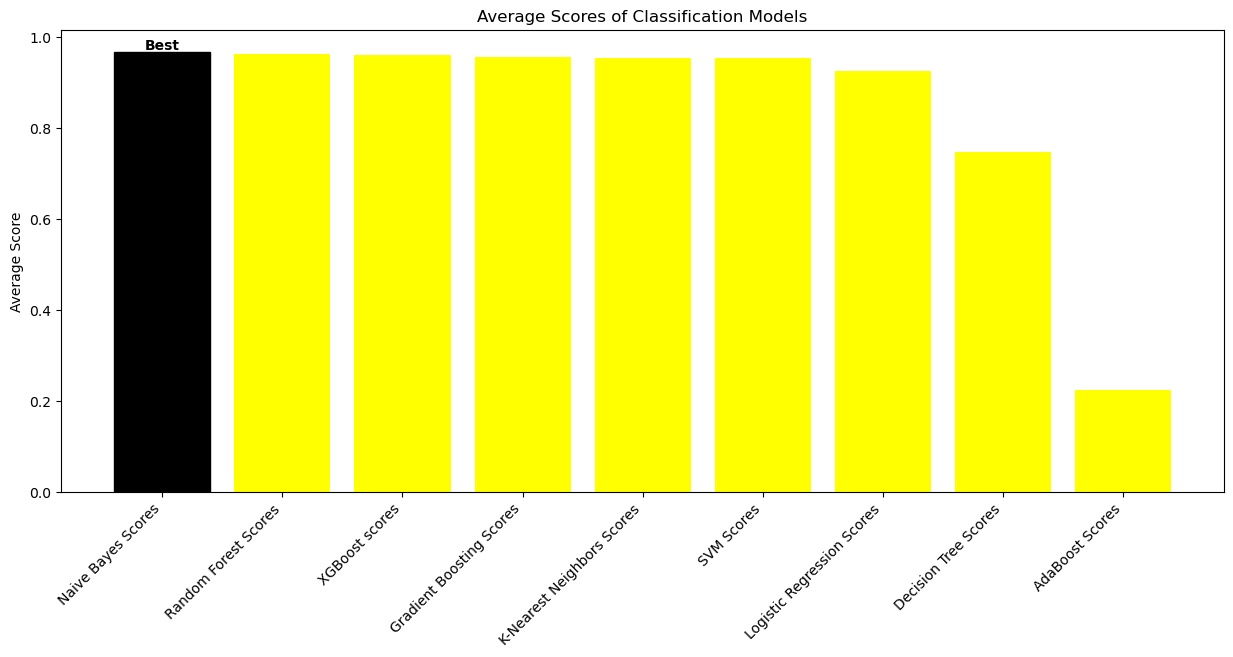

In [147]:

avg_scores = {model: np.mean(scores) for model, scores in model_scores.items()}

# Sort models by average score
sorted_models = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)
models, scores = zip(*sorted_models)

# Plotting
plt.figure(figsize=(15, 6))
bars = plt.bar(models, scores, color='yellow')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Score")
plt.title("Average Scores of Classification Models")

# Highlight the best model
best_index = scores.index(max(scores))
bars[best_index].set_color('black')
plt.text(best_index, scores[best_index] + 0.005, 'Best', ha='center', color='black', fontweight='bold')
plt.show()

In [148]:
from sklearn.model_selection import GridSearchCV


In [149]:
model_params={
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        } 
}

In [150]:
gds= GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=True)

In [151]:
gds.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]},
             return_train_score=True)

In [152]:
gds.best_score_

0.969

In [153]:
gds.best_params_

{'var_smoothing': 1e-09}

In [154]:
gds.predict([[79,48,34,29.444418,79.779061,6.857715,226.326828]])

array([20])

In [155]:
gds.score(x_test,y_test)

0.958

In [156]:
y_pred=gds.predict(x_test)
y_pred

array([16, 16, 16, 16, 16, 16, 16, 11, 16, 11, 11, 16, 11, 11,  1,  3,  3,
       15, 16,  5,  3, 14,  7, 15,  0,  4,  1, 15, 11,  8,  5,  0, 11,  8,
       15, 17, 17, 15,  0, 11,  7,  5, 17,  7,  4,  8, 11,  5, 17,  4,  7,
       17, 16, 15,  7, 17,  7, 15,  3,  0,  4, 18,  7,  0, 12,  4,  3, 17,
        3, 16,  4, 11, 16, 18, 15, 11,  3,  0, 15,  8, 12,  4,  8, 16,  0,
       17,  5, 16, 11,  5,  4, 18,  1,  8,  7,  8,  4, 10, 16, 18,  8, 11,
        1,  8, 14, 12,  0,  1, 17, 10,  2,  1, 17,  1, 12, 14, 15,  1,  6,
        2,  3,  7, 11,  4, 14, 18,  2,  4,  2, 15,  5, 11,  2, 17,  3,  4,
        5,  4,  6,  4,  2, 11,  3,  6, 16, 14, 15,  7, 11,  8, 18,  2,  1,
        2,  1,  6, 10,  4, 14,  2, 12, 20, 15,  7,  1, 13, 18, 10, 17,  5,
        5, 21, 10,  1, 21, 10,  2, 12,  8, 10, 18,  3,  7, 15,  6, 16, 15,
       17,  4, 19,  3, 20,  5, 21,  0,  2,  1,  9,  6, 20, 13,  7, 18, 13,
       13,  7,  5,  2, 14, 11, 16,  3,  8,  5, 21,  0,  9,  3,  3, 14, 17,
        0, 11,  0, 13, 19

In [158]:
df=pd.DataFrame({'actual y value':y_test,'predicted y value':y_pred})
df

,actual y value,predicted y value
4691,16,16
4698,16,16
4713,16,16
4773,16,16
4776,16,16
...,...,...
5995,8,20
5996,11,11
5997,9,9
5998,16,16


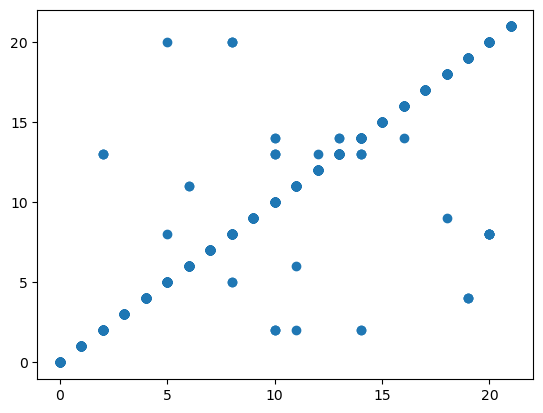

In [160]:
plt.scatter(y_test,y_pred)
plt.show()


In [161]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [162]:
accuracy_score(y_test,y_pred)

0.958

In [163]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 41,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47,  0,  0,

In [164]:
cr=print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        48
           2       0.88      0.93      0.90        45
           3       1.00      1.00      1.00        45
           4       0.94      1.00      0.97        49
           5       0.95      0.95      0.95        44
           6       0.98      0.96      0.97        46
           7       1.00      1.00      1.00        47
           8       0.84      0.89      0.86        46
           9       0.98      1.00      0.99        47
          10       1.00      0.83      0.90        46
          11       0.96      0.96      0.96        46
          12       1.00      0.98      0.99        44
          13       0.81      0.96      0.88        45
          14       0.90      0.90      0.90        48
          15       1.00      1.00      1.00        46
          16       1.00      0.97      0.99        40
          17       1.00    

Text(70.72222222222221, 0.5, 'predicted')

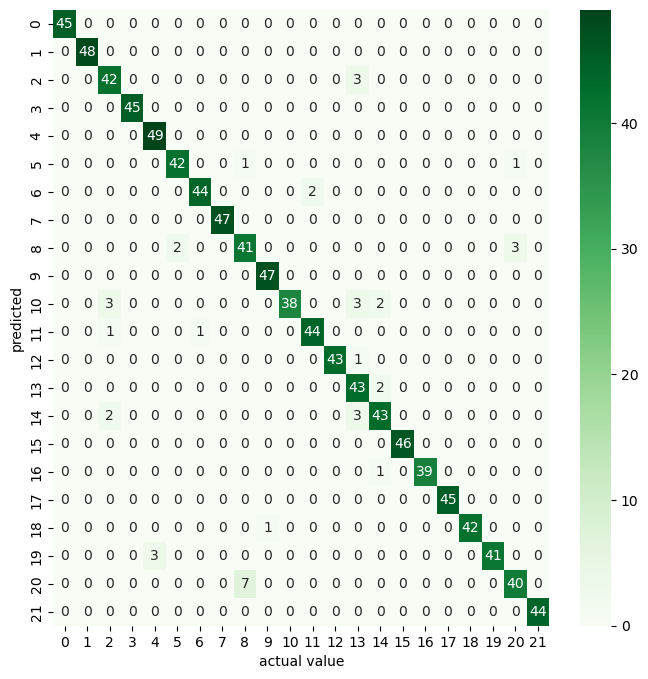

In [166]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap='Greens')
plt.xlabel('actual value')
plt.ylabel('predicted')

In [167]:
corr=data.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.225802,-0.142666,0.013282,0.183540,0.078513,0.072395,-0.027909
P,-0.225802,1.000000,0.718409,-0.121827,-0.120931,-0.117518,-0.069108,-0.475204
K,-0.142666,0.718409,1.000000,-0.134631,0.185697,-0.141615,-0.057638,-0.336007
temperature,0.013282,-0.121827,-0.134631,1.000000,0.202172,-0.007375,-0.039048,0.102409
humidity,0.183540,-0.120931,0.185697,0.202172,1.000000,0.001454,0.096303,0.182683
ph,0.078513,-0.117518,-0.141615,-0.007375,0.001454,1.000000,-0.079484,-0.007627
rainfall,0.072395,-0.069108,-0.057638,-0.039048,0.096303,-0.079484,1.000000,0.049745
label,-0.027909,-0.475204,-0.336007,0.102409,0.182683,-0.007627,0.049745,1.000000


<Axes: >

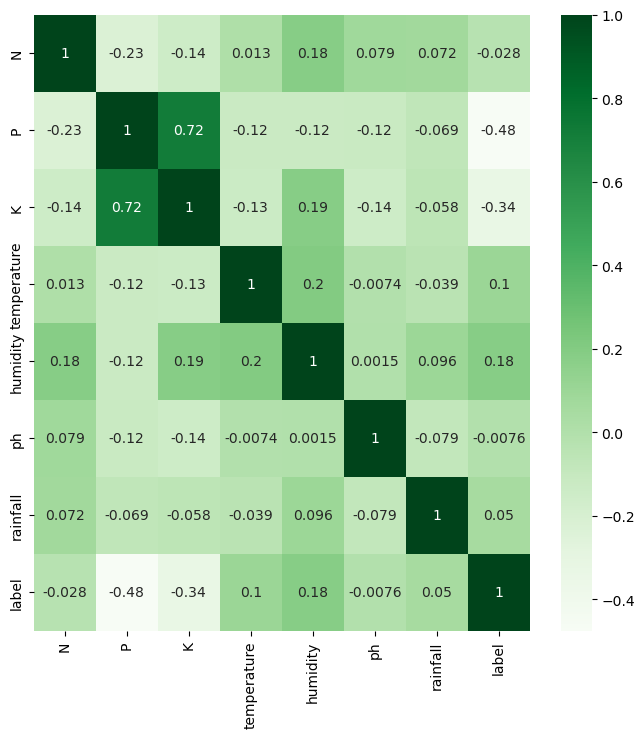

In [168]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='Greens')

# Saving the Model


In [171]:
import joblib

In [172]:
joblib.dump(gds,r"C:\Users\H P\DS\ML\project\Crop_recommendation.pkl")

['C:\\Users\\H P\\DS\\ML\\project\\Crop_recommendation.pkl']

In [173]:
joblib.dump(le1,r"C:\Users\H P\DS\ML\project\le1.pkl")

['C:\\Users\\H P\\DS\\ML\\project\\le1.pkl']